## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [8]:
# you code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
np.random.seed(2042)

In [9]:
random_data = np.random.random((20,2))

In [10]:
random_data

array([[0.77963915, 0.62110776],
       [0.53515387, 0.61704884],
       [0.91407081, 0.33408726],
       [0.92240829, 0.38852099],
       [0.60126364, 0.54772201],
       [0.99958684, 0.44942367],
       [0.42510865, 0.49465704],
       [0.51123914, 0.35731779],
       [0.60705171, 0.90040481],
       [0.6294306 , 0.38047527],
       [0.93740331, 0.05361039],
       [0.17145678, 0.87808611],
       [0.73331524, 0.49308702],
       [0.76886867, 0.11301187],
       [0.06397322, 0.88499842],
       [0.09252854, 0.00879982],
       [0.35131269, 0.74401141],
       [0.63686634, 0.27567137],
       [0.99076196, 0.39772553],
       [0.57501173, 0.45590339]])

In [11]:
X = random_data[:,0]

In [12]:
X.reshape(-1,1)

array([[0.77963915],
       [0.53515387],
       [0.91407081],
       [0.92240829],
       [0.60126364],
       [0.99958684],
       [0.42510865],
       [0.51123914],
       [0.60705171],
       [0.6294306 ],
       [0.93740331],
       [0.17145678],
       [0.73331524],
       [0.76886867],
       [0.06397322],
       [0.09252854],
       [0.35131269],
       [0.63686634],
       [0.99076196],
       [0.57501173]])

In [13]:
y = random_data[:,1]

In [14]:
y

array([0.62110776, 0.61704884, 0.33408726, 0.38852099, 0.54772201,
       0.44942367, 0.49465704, 0.35731779, 0.90040481, 0.38047527,
       0.05361039, 0.87808611, 0.49308702, 0.11301187, 0.88499842,
       0.00879982, 0.74401141, 0.27567137, 0.39772553, 0.45590339])

In [15]:
reg = LinearRegression().fit(X.reshape(-1,1),y)  #20个samples,每个sample只有一个特征

In [16]:
reg.coef_

array([-0.33599349])

In [17]:
reg.intercept_

0.6755199359047648

In [18]:
reg.score(X.reshape(-1,1),y)

0.1386947632958193

In [180]:
def f(x):
    return reg.coef_ * x + reg.intercept_

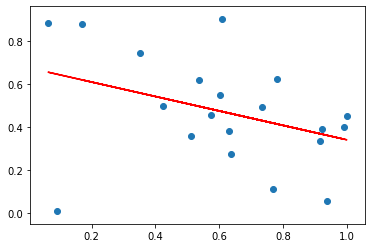

In [181]:
plt.scatter(X,y)
plt.plot(X, f(X),color = 'red')

In [182]:
reg.predict(np.array((0.6)).reshape(-1,1))

array([0.47392384])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [209]:
# you code here
from scipy.spatial.distance import *
def model(X,y):
    return ((Xi,yi) for Xi,yi in zip(X,y))
def distance(x1,x2):
    return abs(x1-x2)
def knn_model(X,y,x,k):
    most_simmilar = sorted(model(X,y), key = lambda xi: distance(xi[0],x))[:k]
    
    y_hat = np.mean([y for x,y in most_simmilar])
    print(most_simmilar)
    return y_hat

In [210]:
knn_model(X,y,0.6,5)

[(0.601263638537684, 0.5477220148730689), (0.6070517127922349, 0.9004048149318782), (0.575011734742257, 0.45590338792309193), (0.6294305966511813, 0.38047527136988746), (0.6368663379349846, 0.2756713743844045)]


0.5120353726964663

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [25]:
# you code here
from collections import Counter
from icecream import ic

In [26]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    ic(probs)
    return -sum(p*np.log(p) for p in probs)

In [218]:
entropy([1,0,0,0])

ic| probs: [0.75, 0.25]


0.5623351446188083

In [464]:
entropy([0,0]) + entropy([1,0])

ic| probs: [1.0]
ic| probs: [0.5, 0.5]


0.6931471805599453

In [19]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [20]:
import pandas as pd

In [21]:
dataset = pd.DataFrame.from_dict(mock_data)

In [22]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [225]:
#gender entropy
entropy([1,1,1,0]) + entropy([0,0,1])

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]


1.198849312913621

In [226]:
#incom entropy
entropy([1,1,0,0,0]) + entropy([1,1])

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [227]:
#family_number entropy
entropy([1,1,0,0,0]) + entropy([1,1])

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [230]:
#第一步特征选择选择income 对于[1,1,0,0,0]信息熵分析
#gender entropy
entropy([1,1,0]) + entropy([0,0])

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


0.6365141682948128

In [231]:
#family_numbers entroopy
entropy([1,0,0,0]) + entropy([1])

ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.5623351446188083

In [233]:
#第二步特征选择选择famliy_numbers
#gender entropy
entropy([1,0]) + entropy([0,0])

ic| probs: [0.5, 0.5]
ic| probs: [1.0]


0.6931471805599453

In [23]:
#最优特征选择
def find_the_optimal_spliter(training_data:pd.DataFrame, target :str):
    x_fields = set(training_data.columns) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(spliter_1)
            entropy_1 = entropy(spliter_1)
            ic(entropy_1)
            
            spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(spliter_2)
            entropy_2 = entropy(spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
        if entropy_v <= min_entropy:
            min_entropy = entropy_v
            spliter = (f,v)
        
    print('the spliter: {}'.format(spliter))
    print('the min_entropy is: {}'.format(min_entropy))
    
    return spliter

In [27]:
find_the_optimal_spliter(dataset,'bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic|

the spliter: ('income', '-10')
the min_entropy is: 0.6730116670092565


('income', '-10')

In [28]:
#持续特征选择，该函数只适用于本次数据集的决策树，不适用于连续二分叉决策树
def continue_find_the_optimal(training_data:pd.DataFrame, target :str):
    x_fields = set(training_data.columns) - {target}
    for i in range(len(x_fields)):
        print('第%i层' %(i+1))
        spliter = find_the_optimal_spliter(training_data, target)    #每一层寻找最佳feature
        spliter_1 = training_data[training_data[spliter[0]] == spliter[1]]   #根据feature拆分数据
        print(spliter_1)
        spliter_2 = training_data[training_data[spliter[0]] != spliter[1]]   #根据feature拆分数据
        print(spliter_2)
        if len(set(spliter_1[target].tolist())) != 1:       #判断bought是否全部相同，若不同更新training_data
            training_data = spliter_1[spliter_1.columns[spliter_1.columns != spliter[0]]] 
        if len(set(spliter_2[target].tolist())) != 1:       #判断bought是否全部相同，若不同更新training_data
            training_data = spliter_2[spliter_2.columns[spliter_2.columns != spliter[0]]] 
    return training_data

In [83]:
#用递归方法实现连续特征选择，该函数适用于连续二分类的决策树
my_tree = {}
def continue_find_the_optimal_1(training_data, target):
    spliter = find_the_optimal_spliter(training_data, target)    #每一层寻找最佳feature

    spliter_1 = training_data[training_data[spliter[0]] == spliter[1]]   #根据feature拆分数据
    print(spliter_1)
    spliter_2 = training_data[training_data[spliter[0]] != spliter[1]]   #根据feature拆分数据
    print(spliter_2)
    
    if len(spliter_1.columns)-1 == 1:
        my_tree[spliter[0]] = [set(spliter_1[spliter[0]].tolist()).pop(),set(spliter_1[target].tolist()).pop()]
        return
        #| set(spliter_1[traget].tolist()) == 1:
    if len(spliter_2.columns)-1 == 1:
        my_tree[spliter[0]] = [set(spliter_2[spliter[0]].tolist()).pop(),set(spliter_2[target].tolist()).pop()]
        return
    
    training_data_1 = spliter_1[spliter_1.columns[spliter_1.columns != spliter[0]]]
    training_data_2 = spliter_2[spliter_2.columns[spliter_2.columns != spliter[0]]]
    
    if len(set(spliter_1[target].tolist())) != 1:       #判断bought是否全部相同，若不同递归
        continue_find_the_optimal_1(training_data_1, target)
    else:
        my_tree[spliter[0]] = [set(spliter_1[spliter[0]].tolist()).pop(),set(spliter_1[target].tolist()).pop()]
    if len(set(spliter_2[target].tolist())) != 1:       #判断bought是否全部相同，若不同递归
        continue_find_the_optimal_1(training_data_2, target)
    else:
        my_tree[spliter[0]] = [set(spliter_2[spliter[0]].tolist()).pop(),set(spliter_2[target].tolist()).pop()]
    
    return my_tree

In [84]:
continue_find_the_optimal_1(training_data = dataset, target = 'bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic|

the spliter: ('income', '-10')
the min_entropy is: 0.6730116670092565
  gender income  family_number  bought
1      F    -10              1       1
6      M    -10              2       1
  gender income  family_number  bought
0      F    +10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0


ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| spliter_2: [0, 0]
ic| probs: [1.0]


the spliter: ('family_number', 2)
the min_entropy is: 0.5623351446188083
  gender  family_number  bought
2      F              2       1
  gender  family_number  bought
0      F              1       1
3      F              1       0
4      M              1       0
5      M              1       0


ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453


the spliter: ('gender', 'M')
the min_entropy is: 0.6931471805599453
  gender  bought
4      M       0
5      M       0
  gender  bought
0      F       1
3      F       0


{'income': ['-10', 1], 'family_number': [2, 1], 'gender': ['M', 0]}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [257]:
from sklearn.cluster import KMeans
import random

In [321]:
X1 = [random.randint(0,100) for x in range(100)]
X2 = [random.randint(0,100) for x in range(100)]

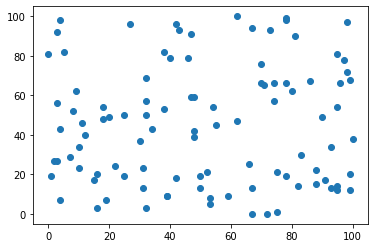

In [322]:
plt.scatter(X1,X2)

In [324]:
training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [325]:
cluster = KMeans(n_clusters = 6, max_iter = 500)

In [326]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [328]:
cluster.labels_

array([0, 4, 3, 5, 3, 2, 3, 0, 0, 5, 3, 5, 2, 3, 0, 2, 2, 4, 0, 2, 5, 2,
       5, 3, 4, 0, 3, 0, 5, 5, 3, 3, 5, 0, 2, 1, 2, 3, 2, 0, 2, 1, 5, 4,
       3, 4, 2, 2, 4, 0, 1, 3, 1, 0, 0, 5, 5, 1, 4, 0, 5, 2, 3, 3, 0, 2,
       1, 4, 2, 1, 1, 5, 3, 3, 1, 5, 4, 5, 3, 3, 1, 4, 4, 3, 0, 4, 0, 3,
       2, 2, 0, 3, 2, 2, 3, 1, 0, 0, 1, 1])

In [330]:
cluster.cluster_centers_

array([[84.52631579, 16.84210526],
       [42.53846154, 48.84615385],
       [10.15789474, 35.63157895],
       [82.27272727, 75.63636364],
       [27.25      , 86.5       ],
       [39.4       , 11.93333333]])

In [351]:
for center in cluster.cluster_centers_:
    print(center)

[84.52631579 16.84210526]
[42.53846154 48.84615385]
[10.15789474 35.63157895]
[82.27272727 75.63636364]
[27.25 86.5 ]
[39.4        11.93333333]


In [332]:
from collections import defaultdict

In [333]:
centers = defaultdict(list)

In [334]:
for label,location in zip(cluster.labels_,training_data):
    centers[label].append(location)

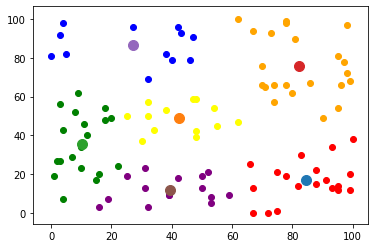

In [345]:
colors = ['red', 'blue', 'orange', 'purple', 'green', 'yellow']

for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, color = colors[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

模型就是对现实世界的内在规则的抽象，所有模型不可能对现实问题百分之百的模拟，总是建立在各种假设条件下的，因为模型在一定的假设条件下
考虑主要问题，只要能帮助我们辅助决策，模型就是有用的。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

+欠拟合：模型没有学得训练集上的特征，即模型对于训练数据表现太差。

+过拟合：模型在训练数据上表现良好，但在泛化表现差，即模型在训练数据上学得了数据的局部微小模式。

+欠拟合原因：模型太过简单；训练数据的特征不具有代表性；模型的正则项参数过多。

+过拟合原因：模型太复杂；训练数据集太少；训练数据集中有噪声，模型把噪声也习得了。

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

precison:所有预测是正类中成功预测为正类的比率

recall:所有正类中成功预测为正类的比率

AUC:area under cover 指ROC曲线(受试者特征曲线)下包的面积，ROC曲线是真正率(召回率)随假正率变化的曲线
$$F1score=\frac{2*precison*recall}{precison+recall}$$

$$F2score =\frac{5*precison*recall}{4*precison+recall}$$

preciosn主要侧重于预测正类样本中预测正类的情况，而对于很多正类被预测为负类不关心，即不允许“错杀”，要保证杀掉的都是目标，不能“错杀”良民，例如通过分类器筛选儿童视频，分类器需保证通过分类器的视频几乎都是儿童能观看的。

recall主要侧重于所有正类中被成功预测为正类的情况，即你可以把所有样本预测为正类，这样召回率为100%，即允许“错杀”，例如预警机制，宁可警报长鸣，也不能漏掉一次风险。

AUC主要用于评估模型分类器的好坏，AUC越大，分类器越好。

F1score是用一个指标来衡量模型分类器precision,recall，而且precison,recall权重相同，当precison,reall都大时，F1score越大

F2score也是用来衡量模型分类器precison,recall的一个指标，但是F2score把precison的权重调大，表明precison不重要，recall更重要。

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

机器学习，是机器根据输入数据，和给定模型，通过优化算法，来自己学得一组满足人类需要的最佳参数。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

正确，因为针对不同的问题，机器学习模型的评价指标有很多种，而正确定义机器学习模型的评价指标，才能针对特定问题构建模型。例如：针对视频监控预警问题，如果选择精确率作为模型的评价标准，训练了一个高精确率的模型，虽然模型发出警报，警察抓到的基本全都是小偷，但是当模型没有发出警报时，可能漏报了很多小偷，造成很大的损失。但是如果采用召回率作为模型的评价标准，训练了一个高召回率的模型，虽然模型会经常发出警报，警察会很忙，但是能保证小偷几乎不会漏网。而如果采用F2score作为模型的评价标准，即考虑召回率更重要，训练了一个F2score高的模型，则警察不会太忙，也能保证小偷都被抓住。达到了出手即成功。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [499]:
# you code here
#定义结点类
class Node:
    def __init__(self,attr = None, value = None, result = None, left = None, right = None):
        self.attr = attr  #该结点将以哪种feature划分，如‘income’
        self.value = value  #该结点对应上一步feature划分的值，如 +10
        self.result = result  #对应买不买 0：不买，1：买
        self.left = left    #左子树
        self.right = right  #右子树
#实例化决策树
tree = Node('income',None,None,Node('family_numbers',+10,None,Node(None, 2, 1, None, None), Node('gender', '1', None, Node(None, 'M', 0, None,None), Node(None, 'F', '1or0', None, None)))
            ,Node(None, -10, 1, None, None))

#定义先序遍历来遍历二叉树
def propagate(tree):
    if tree == None:
        return
    if tree.result != None:
        print((tree.value,tree.result))
    propagate(tree.left)
    propagate(tree.right)

In [500]:
propagate(tree)

(2, 1)
('M', 0)
('F', '1or0')
(-10, 1)


In [96]:
#自动化训练决策树模型，然后根据训练模型预测新实例
def predict(training_data, target,gender: str, income: str, family_number: int):  
    my_tree = continue_find_the_optimal_1(training_data,target)  #调用决策树模型
    print(my_tree)
    features = list(my_tree)  #将训练好的决策树的feature存储起来
    for feature in features:
        value = False
        if feature == 'income':
            value = my_tree[feature][0] == income
        elif feature == 'family_number':
            value = my_tree[feature][0] == family_number
        else:
            value = my_tree[feature][0] == gender
        if value:
            print('the result is: {}'.format(my_tree[feature][1]))

In [95]:
predict(dataset, 'bought', gender = 'M', income = '+10', family_number = 1)

ic| f: 'family_number'
ic| values: {1, 2}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic|

the spliter: ('income', '-10')
the min_entropy is: 0.6730116670092565
  gender income  family_number  bought
1      F    -10              1       1
6      M    -10              2       1
  gender income  family_number  bought
0      F    +10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0


ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| spliter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| spliter_1: [1, 0]
ic| probs: [0.5, 0.5]


the spliter: ('family_number', 2)
the min_entropy is: 0.5623351446188083
  gender  family_number  bought
2      F              2       1
  gender  family_number  bought
0      F              1       1
3      F              1       0
4      M              1       0
5      M              1       0


ic| entropy_1: 0.6931471805599453
ic| spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453


the spliter: ('gender', 'M')
the min_entropy is: 0.6931471805599453
  gender  bought
4      M       0
5      M       0
  gender  bought
0      F       1
3      F       0
{'income': ['-10', 1], 'family_number': [2, 1], 'gender': ['M', 0]}
the result is: 0


没有用结点类和决策树分类器类递归实现决策树的生成和预测，太失败了！！！

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

绝对值loss函数：
$$loss = \frac{1}{n}\sum{|{y-\hat{y}}|}$$
$$loss = \frac{1}{n}\sum{|{y-(kx+b)}|}$$

绝对值loss函数对k的偏导：
$$\frac{\partial{loss}}{\partial{k}}=\frac{1}{n}\sum{(-x_i+x_j)}$$ $$when (y-\hat{y})>0,-x_i,  when (y-\hat{y})<=0,x_j$$

In [655]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [656]:
# you code here
def loss(y, y_hat):
    return sum(abs(yi-y_hat_i) for yi, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [657]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i-y_hat_i>=0:
            g = -x_i 
        else:
            g = x_i
        gradient += g 
    return gradient

In [661]:
k = random.random() * 20 - 10
b = random.random() * 20 - 10
learning_rate = 1e-2
iteration_numbers = 1000
losses = []

for i in range(iteration_numbers):
    current_price_parameters = [price(r, k, b) for r in X]
    current_loss = loss(y, current_price_parameters)
    losses.append(current_loss)
    print('iteration: {},the curren_loss: {}, the current_k: {}'.format(i+1, current_loss, k))
    
    gradient_k = partial_derivative_k(X,y,current_price_parameters)
    k = k + (-gradient_k * learning_rate)
best_k = k 
best_b = b

iteration: 1,the curren_loss: 7.848993463420243, the current_k: -2.2470181945662304
iteration: 2,the curren_loss: 7.77400568037349, the current_k: -2.3694827061985846
iteration: 3,the curren_loss: 7.699017897326733, the current_k: -2.4919472178309388
iteration: 4,the curren_loss: 7.624030114279978, the current_k: -2.614411729463293
iteration: 5,the curren_loss: 7.549042331233222, the current_k: -2.736876241095647
iteration: 6,the curren_loss: 7.47405454818647, the current_k: -2.8593407527280013
iteration: 7,the curren_loss: 7.399066765139713, the current_k: -2.9818052643603554
iteration: 8,the curren_loss: 7.324078982092958, the current_k: -3.1042697759927096
iteration: 9,the curren_loss: 7.249091199046203, the current_k: -3.2267342876250638
iteration: 10,the curren_loss: 7.17410341599945, the current_k: -3.349198799257418
iteration: 11,the curren_loss: 7.099115632952691, the current_k: -3.471663310889772
iteration: 12,the curren_loss: 7.024127849905938, the current_k: -3.5941278225221

iteration: 824,the curren_loss: 2.9107510241353394, the current_k: -12.473138919279117
iteration: 825,the curren_loss: 2.910679193453317, the current_k: -12.469348650633698
iteration: 826,the curren_loss: 2.910607362771294, the current_k: -12.465558381988279
iteration: 827,the curren_loss: 2.9105557288413193, the current_k: -12.46176811334286
iteration: 828,the curren_loss: 2.910755123289051, the current_k: -12.473355218127336
iteration: 829,the curren_loss: 2.9106832926070294, the current_k: -12.469564949481917
iteration: 830,the curren_loss: 2.910611461925007, the current_k: -12.465774680836498
iteration: 831,the curren_loss: 2.9105431974542233, the current_k: -12.461984412191079
iteration: 832,the curren_loss: 2.910759222442764, the current_k: -12.473571516975555
iteration: 833,the curren_loss: 2.9106873917607414, the current_k: -12.469781248330136
iteration: 834,the curren_loss: 2.910615561078719, the current_k: -12.465990979684717
iteration: 835,the curren_loss: 2.910543730396697,

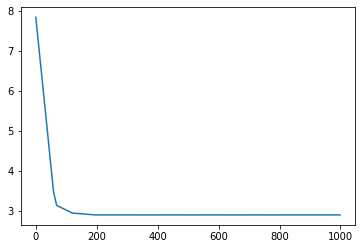

In [662]:
plt.plot(list(range(iteration_numbers)),losses)

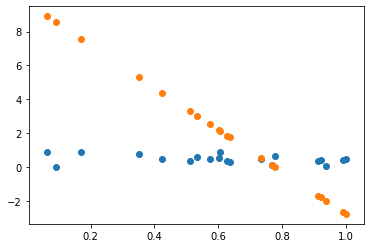

In [664]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X]

plt.scatter(X,y)
plt.scatter(X,price_use_best_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)